# Analysis of Indian Liver Patients.

The dataset was downloaded from the UCI ML Repository.

Here are the steps I'm going to perform:  
1) Data Analysis: This is in general looking at the data to figure out whats going on. Inspect the data: Check whether there is any missing data, irrelevant data and do a cleanup.  
2) Data Visualization:   
3) Feature selection.  
2) Search for any trends, relations & correlations.  
3) Draw an inference and predict whether the patient can be identified to be having liver disease or not  

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Analysis

In [2]:
#Read the training & test data
liver_df = pd.read_csv('indian_liver_patient.csv')

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:   
1) Only gender is non-numeric veriable. All others are numeric.   
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.  

In [5]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature    

# Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


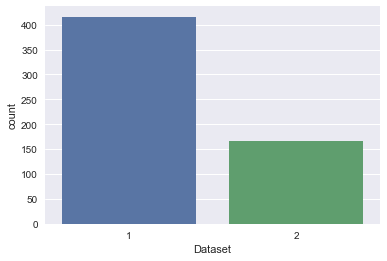

In [8]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


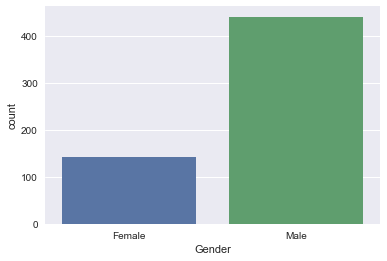

In [12]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)


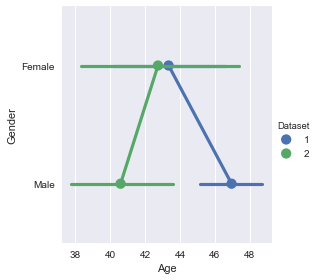

In [16]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

Age seems to be a factor for liver disease for both male and female genders

In [21]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [22]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


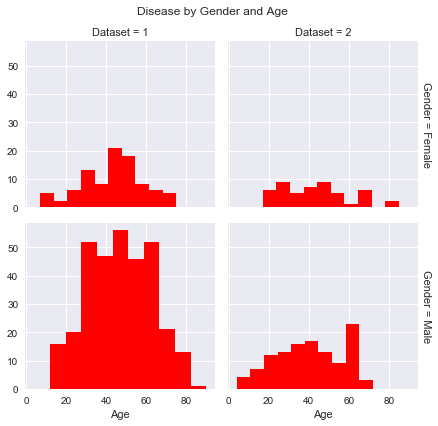

In [23]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

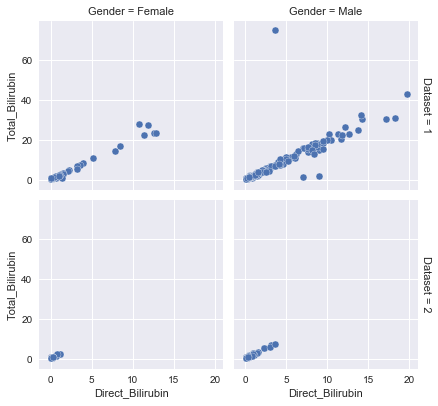

In [25]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

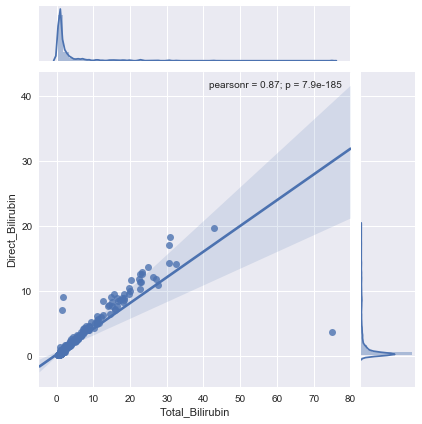

In [26]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

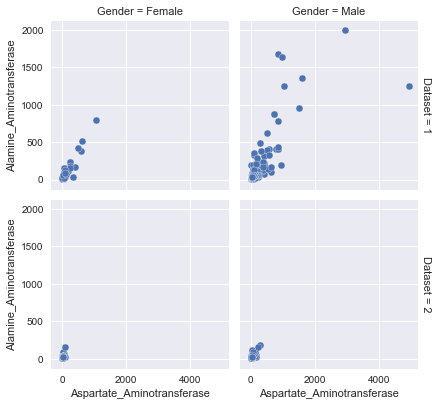

In [27]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

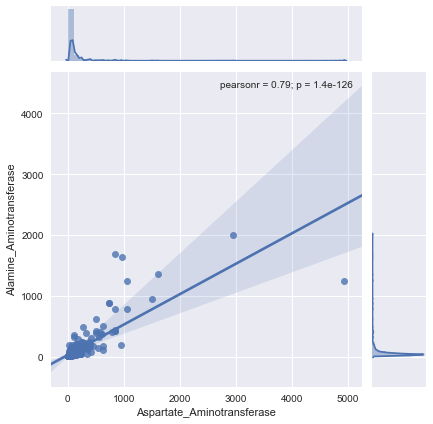

In [28]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

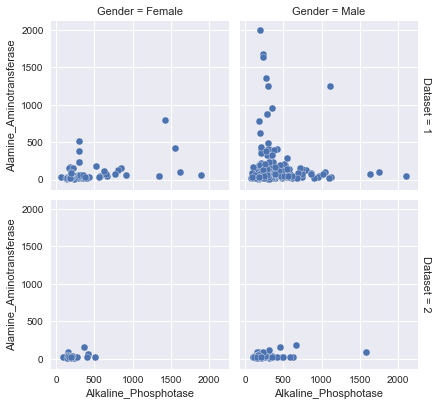

In [29]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

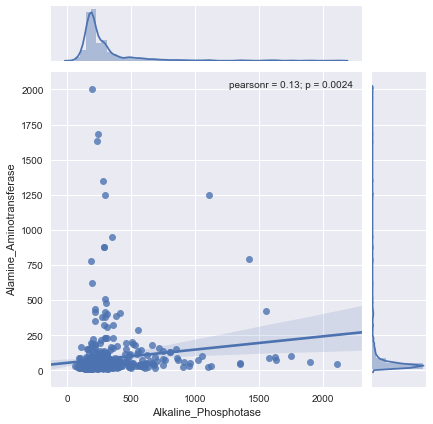

In [30]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

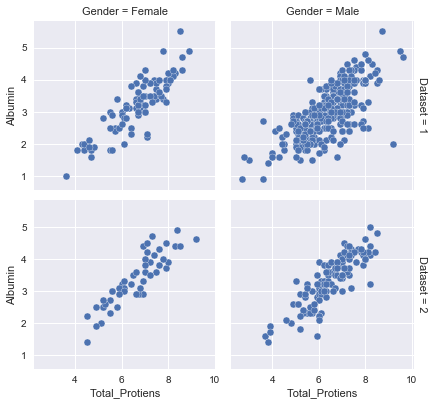

In [31]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

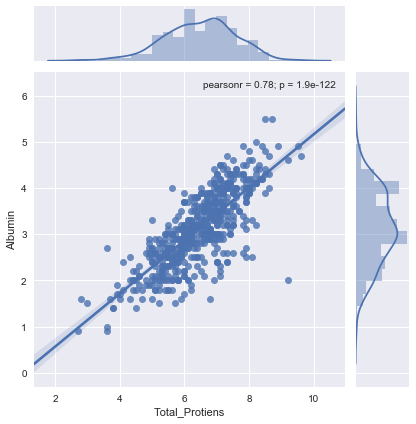

In [32]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

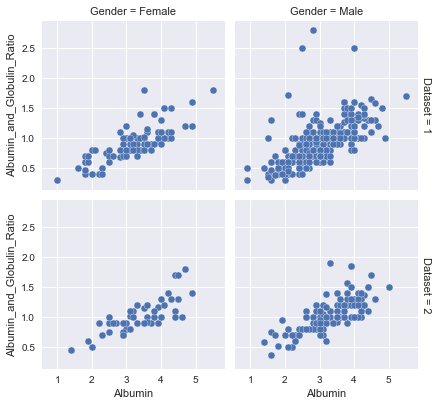

In [33]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

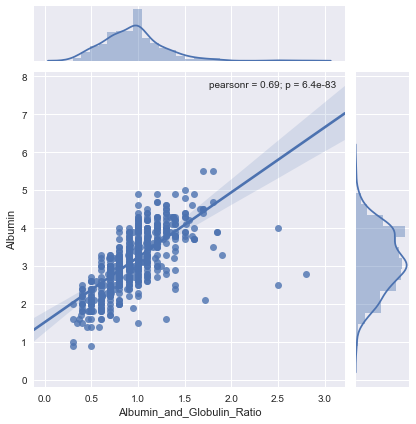

In [34]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

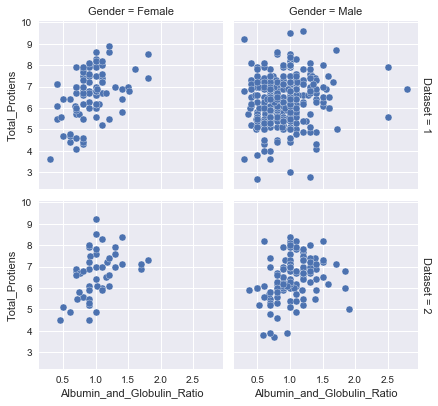

In [35]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:  
Direct_Bilirubin & Total_Bilirubin  
Aspartate_Aminotransferase & Alamine_Aminotransferase  
Total_Protiens & Albumin  
Albumin_and_Globulin_Ratio & Albumin  

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:  
Total_Bilirubin  
Alamine_Aminotransferase  
Total_Protiens  
Albumin_and_Globulin_Ratio  
Albumin  

In [36]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


# Feature scaling

In [37]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [39]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [40]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [41]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [42]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [44]:
#liver_df[liver_df['Albumin_and_Globulin_Ratio'] == 0.9470639032815201]

In [43]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
x = liver_df.drop(['Gender','Dataset'], axis=1)
x.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [44]:
features = x

In [45]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [48]:
# Correlation
liver_corr = x.corr()

In [49]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


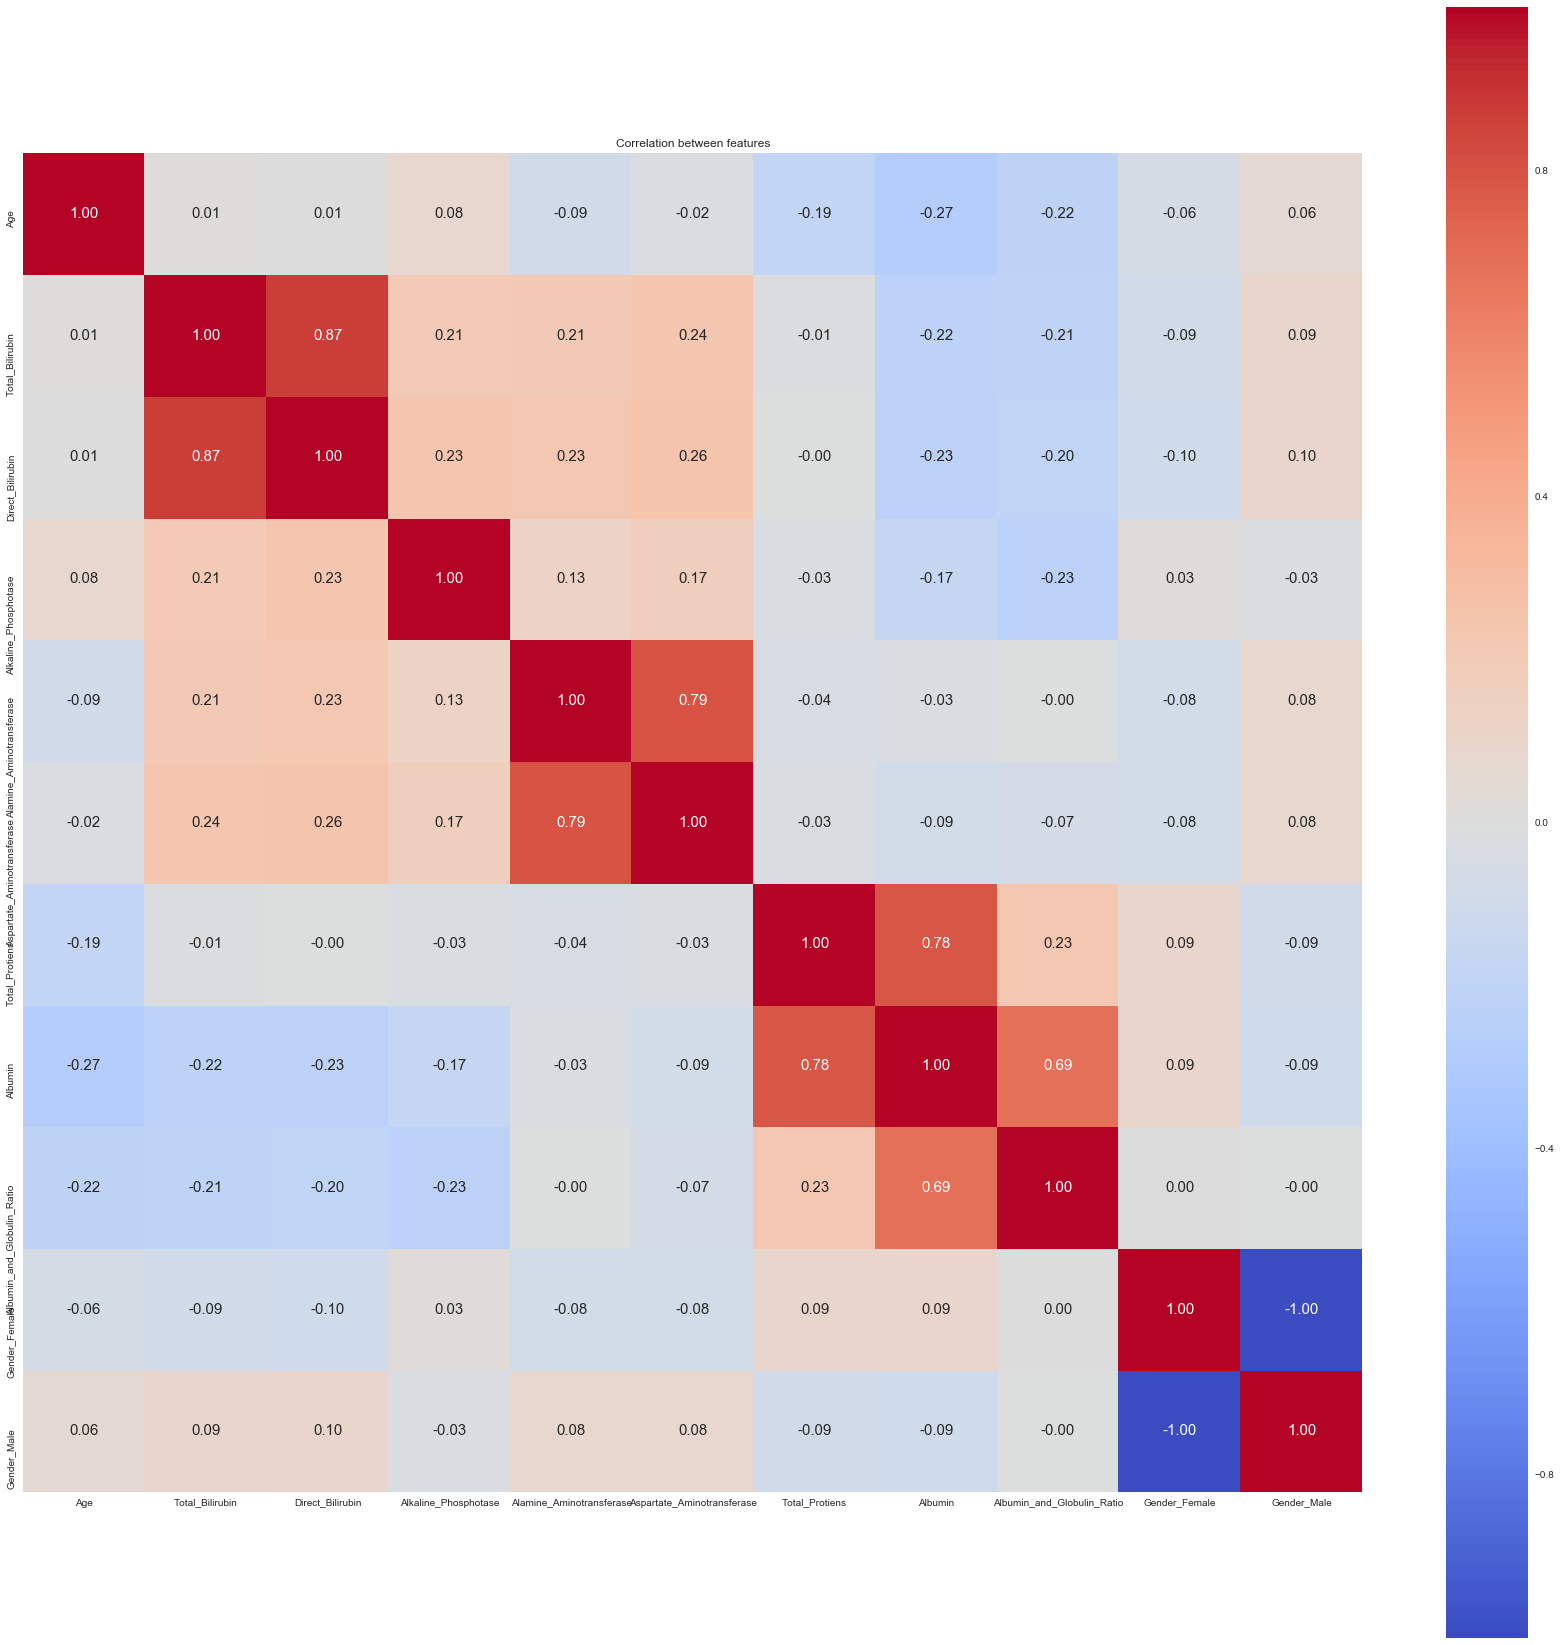

In [50]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [51]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [52]:
x.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

# Machine Learning

In [83]:
#Model, Predict & Solve
#This problem is a Classification & Regression problem. We want to identify relationship between output (liver disease or not) with other variables or features. 

In [57]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [58]:
x.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [68]:
#The above accuracy is not something that we want. Lets try to reduce the number of features
finX = x
#finX = liver_df[['Age', 'Gender_Male', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Total_Protiens']]
#finX = liver_df[['Alkaline_Phosphotase', 'Aspartate_Aminotransferase','Age','Total_Protiens', 'Total_Bilirubin']]
#finX = liver_df[['Alkaline_Phosphotase', 'Albumin_and_Globulin_Ratio', 'Gender_Female', 'Direct_Bilirubin', 'Total_Protiens']]
finX.head(4)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


In [60]:
# 1) Linear Regression
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 13.12
Linear Regression Test Score: 
 8.07
Coefficient: 
 [ -2.53338525e-03  -4.02775624e-04  -2.29658815e-02  -2.17508414e-04
  -3.93047877e-04   6.12504741e-05  -5.55814496e-02   8.31023933e-02
   6.22099710e-02   4.61371689e-02  -4.61371689e-02]
Intercept: 
 1.59425288848


Logistic Regression Training Score: 
 73.53
Logistic Regression Test Score: 
 66.29
Coefficient: 
 [[-0.01331769 -0.02784431 -0.47763818 -0.00100417 -0.01052479 -0.00310638
  -0.21314881  0.22396705  0.65589383  0.49060503  0.24834804]]
Intercept: 
 [ 0.73895307]
Accuracy: 
 0.662857142857
Confusion Matrix: 
 [[104  20]
 [ 39  12]]
Classification Report: 
              precision    recall  f1-score   support

          1       0.73      0.84      0.78       124
          2       0.38      0.24      0.29        51

avg / total       0.62      0.66      0.64       175



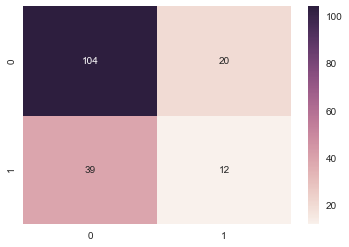

In [61]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [63]:
coeff_df = pd.DataFrame(x.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.655894
9,Gender_Female,0.490605
10,Gender_Male,0.248348
7,Albumin,0.223967
3,Alkaline_Phosphotase,-0.001004
5,Aspartate_Aminotransferase,-0.003106
4,Alamine_Aminotransferase,-0.010525
0,Age,-0.013318
1,Total_Bilirubin,-0.027844
6,Total_Protiens,-0.213149


Gaussian Score: 
 56.13
Gaussian Test Score: 
 53.14
Accuracy: 
 0.531428571429
[[44 80]
 [ 2 49]]
             precision    recall  f1-score   support

          1       0.96      0.35      0.52       124
          2       0.38      0.96      0.54        51

avg / total       0.79      0.53      0.53       175



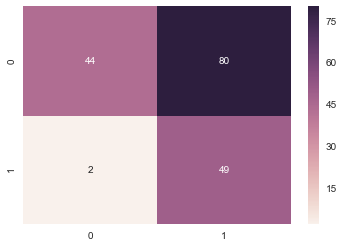

In [64]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [65]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
#Predict Output
svc_predicted= svc.predict(X_test)

svc_score = round(svc.score(X_train, y_train) * 100, 2)
svc_score_test = round(svc.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

SVM Score: 
 99.51
SVM Test Score: 
 72.57
Accuracy: 
 0.725714285714
[[124   0]
 [ 48   3]]
             precision    recall  f1-score   support

          1       0.72      1.00      0.84       124
          2       1.00      0.06      0.11        51

avg / total       0.80      0.73      0.63       175



In [66]:
#In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method 
#used for classification and regression. A sample is classified by a majority vote of its neighbors, 
#with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, 
#typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 
#KNN confidence score is better than Logistics Regression but worse than SVM.

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
#Predict Output
knn_predicted =  knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)
print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test,knn_predicted))
print(confusion_matrix(y_test,knn_predicted))
print(classification_report(y_test,knn_predicted))

KNN Score: 
 82.35
KNN Test Score: 
 62.29
Accuracy: 
 0.622857142857
[[91 33]
 [33 18]]
             precision    recall  f1-score   support

          1       0.73      0.73      0.73       124
          2       0.35      0.35      0.35        51

avg / total       0.62      0.62      0.62       175



In [67]:
#This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions 
#about the target value (tree leaves). Tree models where the target variable can take a finite set of values 
#are called classification trees; in these tree structures, leaves represent class labels and branches 
#represent conjunctions of features that lead to those class labels. Decision trees where the target variable 
#can take continuous values (typically real numbers) are called regression trees. 
#The model confidence score is the highest among models evaluated so far.

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#Predict Output
dtree_predicted = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train)* 100, 2)
decision_tree_score_test = round(decision_tree.score(X_test, y_test)* 100, 2)
print('Decision Tree Score: \n', decision_tree_score)
print('Decision Tree Test Score: \n', decision_tree_score_test)
print('Accuracy: \n', accuracy_score(y_test,dtree_predicted))
print(confusion_matrix(y_test,dtree_predicted))
print(classification_report(y_test,dtree_predicted))

Decision Tree Score: 
 100.0
Decision Tree Test Score: 
 66.86
Accuracy: 
 0.668571428571
[[92 32]
 [26 25]]
             precision    recall  f1-score   support

          1       0.78      0.74      0.76       124
          2       0.44      0.49      0.46        51

avg / total       0.68      0.67      0.67       175



In [68]:
from sklearn import tree
# Decision Tree Classification
dectreeCls = tree.DecisionTreeClassifier(criterion='gini') 
# for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
dectreeCls.fit(X_train, y_train)
#Predict Output
predicted= dectreeCls.predict(X_test)

dectreeCls_score = round(dectreeCls.score(X_train, y_train) * 100, 2)
dectreeCls_score_test = round(dectreeCls.score(X_test, y_test) * 100, 2)

print(' Decision Tree Classification Score: \n', dectreeCls_score)
print(' Decision Tree Classification Test Score: \n', dectreeCls_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

 Decision Tree Classification Score: 
 100.0
 Decision Tree Classification Test Score: 
 64.0
Accuracy: 
 0.64
[[85 39]
 [24 27]]
             precision    recall  f1-score   support

          1       0.78      0.69      0.73       124
          2       0.41      0.53      0.46        51

avg / total       0.67      0.64      0.65       175



In [69]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
#gbclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Score: 
 91.18
Test Score: 
 61.71
Accuracy: 
 0.617142857143
[[90 34]
 [33 18]]
             precision    recall  f1-score   support

          1       0.73      0.73      0.73       124
          2       0.35      0.35      0.35        51

avg / total       0.62      0.62      0.62       175



In [70]:
#The next model Random Forests is one of the most popular. Random forests or random decision forests are an 
#ensemble learning method for classification, regression and other tasks, that operate by constructing a 
#multitude of decision trees (n_estimators=100) at training time and outputting the class that is the 
#mode of the classes (classification) or mean prediction (regression) of the individual trees. 
#The model confidence score is the highest among models evaluated so far. 
#We decide to use this model's output (Y_pred) for creating our competition submission of results.

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 69.71
Accuracy: 
 0.697142857143
[[90 34]
 [33 18]]
             precision    recall  f1-score   support

          1       0.73      0.73      0.73       124
          2       0.35      0.35      0.35        51

avg / total       0.62      0.62      0.62       175



In [71]:
# Neural Networks

neural = MLPClassifier(hidden_layer_sizes=30,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=1337,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Neural Score: 
 69.61
Neural Test Score: 
 68.57
Accuracy: 
 0.685714285714
[[119   5]
 [ 50   1]]
             precision    recall  f1-score   support

          1       0.70      0.96      0.81       124
          2       0.17      0.02      0.04        51

avg / total       0.55      0.69      0.59       175



In [77]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
#While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' 
#habit of overfitting to their training set.

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier', 
              'Gaussian Naive Bayes', 'Decision Tree', 'Decision Tree Classification', 'Random Forest', 
              'Gradient Boosting', 'Neural NW'  ],
    'Score': [linear_score, logreg_score, svc_score, knn_score, 
              gauss_score, decision_tree_score, dectreeCls_score, random_forest_score, 
              gbclass_score, neural_score],
    'Test Score': [linear_score_test, logreg_score_test, svc_score_test, knn_score_test, 
                   gauss_score_test, decision_tree_score_test, dectreeCls_score_test, random_forest_score_test, 
                   gbclass_score_test, neural_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Support Vector Machines,99.51,72.57
7,Random Forest,100.00,69.71
9,Neural NW,69.61,68.57
5,Decision Tree,100.00,66.86
1,Logistic Regression,73.53,66.29
6,Decision Tree Classification,100.00,64.00
3,KNeighborsClassifier,82.35,62.29
8,Gradient Boosting,91.18,61.71
4,Gaussian Naive Bayes,56.13,53.14
0,Linear Regression,13.12,8.07


In [80]:
#I tried removing some of the features to check whether the accuracy can be improved.
#However, it remained the same for the following features, but decreased when I removed any one of the following.
finX = liver_df[['Age','Alkaline_Phosphotase', 'Albumin_and_Globulin_Ratio', 'Gender_Female', 'Gender_Male','Total_Bilirubin', 'Total_Protiens']]
finX.head(4)

,Age,Alkaline_Phosphotase,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Total_Bilirubin,Total_Protiens
0,65,187,0.90,1,0,0.7,6.8
1,62,699,0.74,0,1,10.9,7.5
2,62,490,0.89,0,1,7.3,7.0
3,58,182,1.00,0,1,1.0,6.8


In [81]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

In [82]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
#Predict Output
svc_predicted= svc.predict(X_test)

svc_score = round(svc.score(X_train, y_train) * 100, 2)
svc_score_test = round(svc.score(X_test, y_test) * 100, 2)

print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

SVM Score: 
 97.3
SVM Test Score: 
 72.57
Accuracy: 
 0.725714285714
[[122   2]
 [ 46   5]]
             precision    recall  f1-score   support

          1       0.73      0.98      0.84       124
          2       0.71      0.10      0.17        51

avg / total       0.72      0.73      0.64       175



In [87]:
(liver_df.dtypes == object).sum()

1

In [91]:
liver_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [93]:
ldf = pd.read_csv('indian_liver_patient.csv')

In [95]:
(ldf.isnull().sum()).Albumin_and_Globulin_Ratio    

4

In [99]:
ldf[~ldf.Albumin_and_Globulin_Ratio.isnull()].isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
ldf.dropna